BERTELOOT Emile

DE SCHAMPHELEIRE Ben

In [ ]:
from google.colab import files
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

Clone the images from a GitHub repository

In [ ]:
!git clone https://github.com/BenDeSchampheleire/Machine_Learning_ISAR.git

fatal: destination path 'Machine_Learning_ISAR' already exists and is not an empty directory.


#BE noté : Classification des cibles radar à partir des images ISAR (Radar à synthèse d'ouverture inverse)

## Partie 1: Analyse des données ISAR

### Question 1

#### a)

In [82]:
path = os.path.expanduser('/content/Machine_Learning_ISAR/Images_ISAR')
files = glob.glob(path + "/*.bmp") #Get the bmp files of the database

def extract_name(file):
    file_name = file.split('/')[-1]
    file_name_no_extension = file_name.split('.bmp')[0]
    class_image = file_name_no_extension.split('_')[0]
    number_image = file_name_no_extension.split('_')[1]
    return class_image, number_image

In [56]:
dic = {}
for f in files:
    class_image, number_image = extract_name(f)
    try:
        dic[class_image] +=1
    except KeyError:
        dic[class_image] = 1

There are 5 classes, named:  

In [57]:
print(dic.keys())

dict_keys(['F14', 'F15', 'F4', 'A10', 'F16'])


Each containing the following number of images (respectively):

In [58]:
print(dic.values())

dict_values([162, 162, 162, 162, 162])


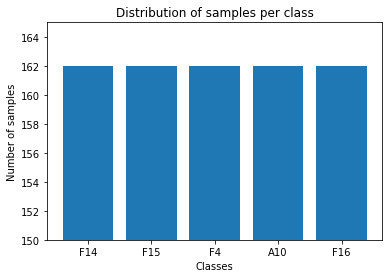

In [26]:
plt.bar( dic.keys(), dic.values() )
plt.title('Distribution of samples per class')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.ylim((150, 165))
plt.show()

We see that the images are distributed uniformly over the different classes

#### b)

In [27]:
img = np.array(Image.open(files[0]))

Size of one image:

In [28]:
print(img.shape)

(256, 256)


with a minimal value of:

In [29]:
print(np.min(img))

0


and a maximal value of:

In [30]:
print(np.max(img))

255


Thus, every image is composed of 256x256 pixels, each containing one byte of data

#### c)

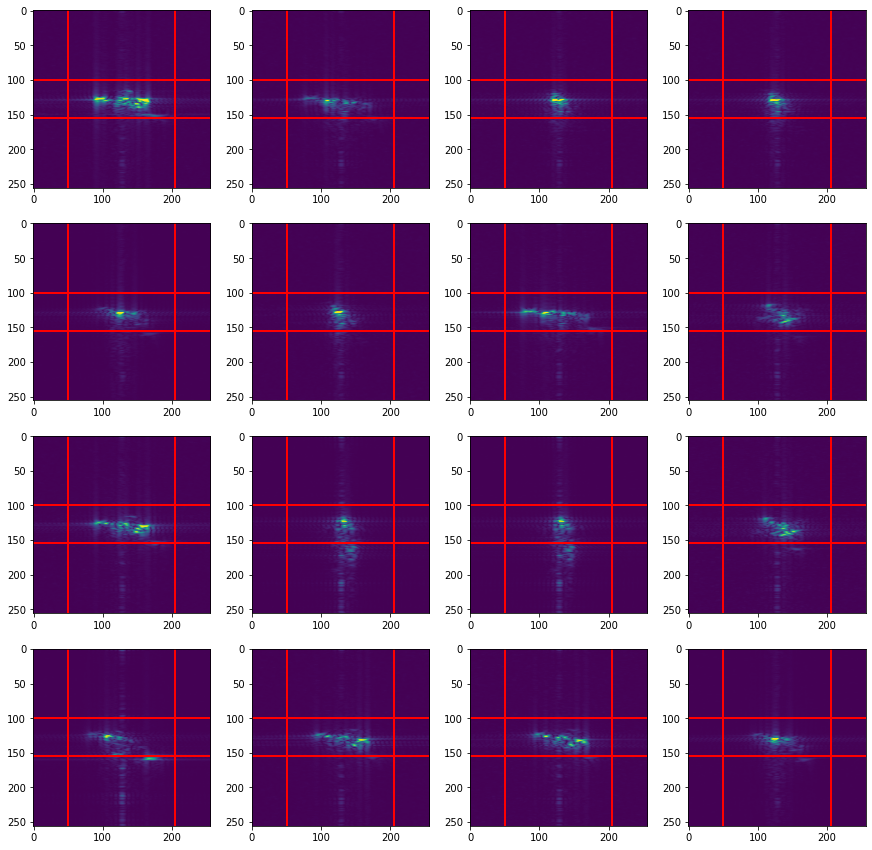

In [33]:
x_crop = 50
y_crop = 100
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        file = random.choice(files) # we choose a random file to show the cropping
        img = np.array(Image.open(file))
        axs[i,j].imshow(img)
        axs[i,j].plot([x_crop, x_crop], [0, 255], 'r-', lw=2)
        axs[i,j].plot([255 - x_crop, 255 - x_crop], [0, 255], 'r-', lw=2)
        axs[i,j].plot([0, 255], [y_crop, y_crop], 'r-', lw=2)
        axs[i,j].plot([0, 255], [255 - y_crop, 255 - y_crop], 'r-', lw=2)
plt.show()

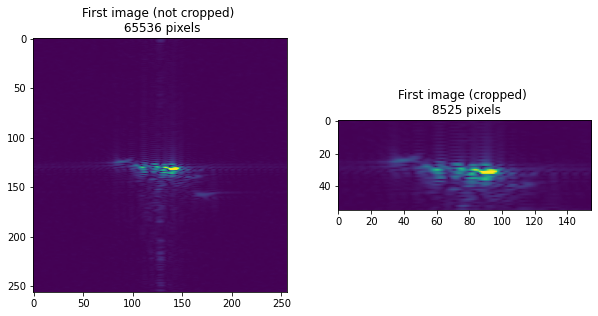

In [52]:
first_image = np.array(Image.open(files[0]))
first_image_cropped = first_image[y_crop:255-y_crop, x_crop:255-x_crop]

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow( first_image )
axs[0].title.set_text('First image (not cropped) \n {} pixels'.format(first_image.size))
axs[1].imshow( first_image_cropped )
axs[1].title.set_text('First image (cropped) \n {} pixels'.format(first_image_cropped.size))
plt.show()

We we able to reduce the number of pixels from:

In [53]:
print(first_image.size)

65536


to:

In [54]:
print(first_image_cropped.size)

8525


### Question 2

In [ ]:
def load_bdd(path):
    files = glob.glob(path + "/*.bmp") #Get the bmp files of the database

    # cropped_length = (255-2*x_crop)*(255-2*y_crop)
    res = {'data':np.zeros([cropped_length, len(files)]),'classes':[]}
    for i in range(len(files)):
        res['data'][:,i] = np.array( Image.open(files[i]) )[x_crop:255-x_crop, y_crop:255-y_crop].flatten()
        res['classes'].append(files[i].split("/")[-1].split("_")[0])
    return res

data = load_bdd()

print(data["classes"][0])
print(data["data"].shape)

In [86]:
def load_bdd(path):
  files = glob.glob(path + "/*.bmp") #Get the bmp files of the database

  size = Image.open(files[0]).size
  numel = size[0]*size[1]
  X = np.zeros([numel, len(files)])
  y = []
  for i in range(len(files)):
        X[:,i] = np.array( Image.open(files[i]) ).flatten()
        class_image, number_image = extract_name(files[i])
        y.append(class_image)
  return X, y

In [91]:
X, y = load_bdd(path)